# Øving 7

## Oppgave 

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

## #1) 

Bruker `sklearn.metrics.silhouette_score` for å finne en god verdi for antall kluster. 

In [2]:
import pandas as pd 
from tqdm import trange

data = pd.get_dummies(pd.read_csv('../oving6/agaricus-lepiota.csv'))

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

res = []

for k in range(2,31):
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    silscore = silhouette_score(data, km.labels_)
    res.append(silscore)
    print("K = {:>2d}, Score = {:>.5f}".format(k, res[-1]))
    #print("k=%i: %f, %f"%(k,silscore,km.inertia_))



K =  2, Score = 0.18032
K =  3, Score = 0.22832
K =  4, Score = 0.23009
K =  5, Score = 0.26021
K =  6, Score = 0.27714
K =  7, Score = 0.28417
K =  8, Score = 0.30096
K =  9, Score = 0.30717
K = 10, Score = 0.25167
K = 11, Score = 0.26819
K = 12, Score = 0.20862
K = 13, Score = 0.15911
K = 14, Score = 0.16400
K = 15, Score = 0.16700
K = 16, Score = 0.16546
K = 17, Score = 0.15759
K = 18, Score = 0.17334
K = 19, Score = 0.14597
K = 20, Score = 0.17106
K = 21, Score = 0.14256
K = 22, Score = 0.14832
K = 23, Score = 0.16357
K = 24, Score = 0.15375
K = 25, Score = 0.16567
K = 26, Score = 0.14715
K = 27, Score = 0.14995
K = 28, Score = 0.16707
K = 29, Score = 0.15564
K = 30, Score = 0.15886


## #2) 

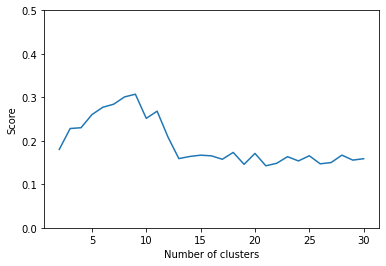

In [3]:
import matplotlib.pyplot as plt

plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.plot(range(2,len(res)+2), res)
plt.ylim(bottom=.0, top=.5)
plt.show()

## #3)

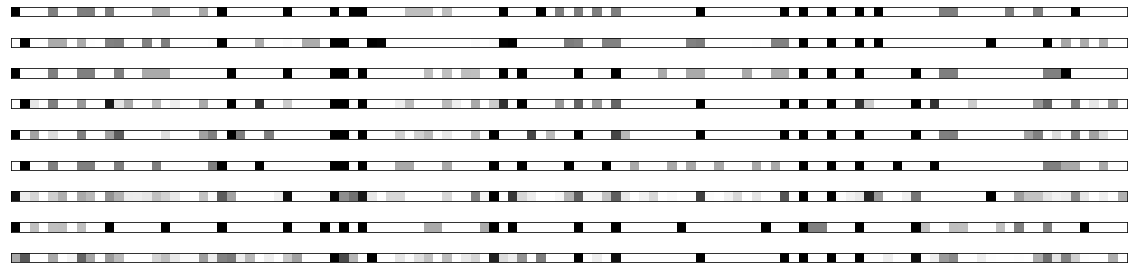

In [34]:
from sklearn.cluster import KMeans

k = res.index(max(res)) + 2

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)
clusters = kmeans.predict(data)

fig, ax = plt.subplots(k, 1, figsize=(20, 5))
centers = kmeans.cluster_centers_.reshape(k, 1, 119)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

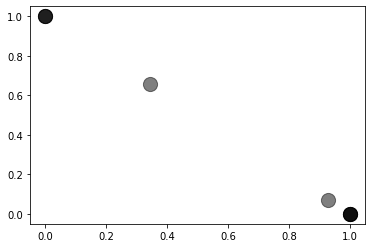

In [40]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);